In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

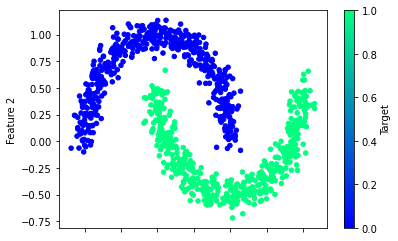

In [3]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [5]:
# Create training and testing sets

from sklearn.model_selection import train_test_split

X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.7955 - accuracy: 0.2800
Epoch 2/100
750/750 [==============================] - 0s 55us/sample - loss: 0.7836 - accuracy: 0.2280
Epoch 3/100
750/750 [==============================] - 0s 56us/sample - loss: 0.7733 - accuracy: 0.2307
Epoch 4/100
750/750 [==============================] - 0s 58us/sample - loss: 0.7641 - accuracy: 0.2333
Epoch 5/100
750/750 [==============================] - 0s 55us/sample - loss: 0.7557 - accuracy: 0.2347
Epoch 6/100
750/750 [==============================] - 0s 63us/sample - loss: 0.7485 - accuracy: 0.2413
Epoch 7/100
750/750 [==============================] - 0s 65us/sample - loss: 0.7420 - accuracy: 0.2520
Epoch 8/100
750/750 [==============================] - 0s 60us/sample - loss: 0.7364 - accuracy: 0.2507
Epoch 9/100
750/750 [==============================] - 0s 58us/sample - loss: 0.7313 - accuracy: 0.2573
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 51us/sample - loss: 0.4936 - accuracy: 0.7747
Epoch 79/100
750/750 [==============================] - 0s 51us/sample - loss: 0.4881 - accuracy: 0.7800
Epoch 80/100
750/750 [==============================] - 0s 50us/sample - loss: 0.4829 - accuracy: 0.7840
Epoch 81/100
750/750 [==============================] - 0s 49us/sample - loss: 0.4778 - accuracy: 0.7893
Epoch 82/100
750/750 [==============================] - 0s 50us/sample - loss: 0.4728 - accuracy: 0.7920
Epoch 83/100
750/750 [==============================] - 0s 51us/sample - loss: 0.4678 - accuracy: 0.7973
Epoch 84/100
750/750 [==============================] - 0s 50us/sample - loss: 0.4632 - accuracy: 0.8000
Epoch 85/100
750/750 [==============================] - 0s 50us/sample - loss: 0.4584 - accuracy: 0.8000
Epoch 86/100
750/750 [==============================] - 0s 50us/sample - loss: 0.4541 - accuracy: 0.8000
Epoch 87/100
750/750 [==============================] - 0s 52us/samp

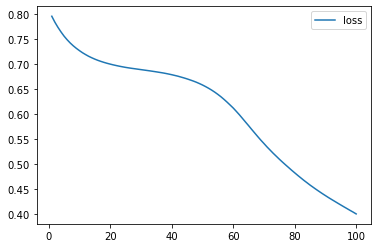

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

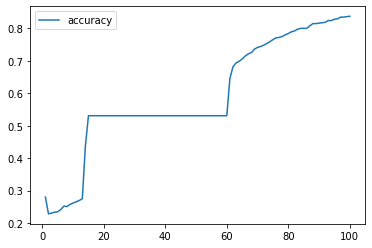

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_moon_test_scaled,y_moon_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.4478 - accuracy: 0.8200
Loss: 0.44538789319992067, Accuracy: 0.8199999928474426


In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 996us/sample - loss: 0.6273 - accuracy: 0.7080
Epoch 2/100
750/750 [==============================] - 0s 55us/sample - loss: 0.5915 - accuracy: 0.7347
Epoch 3/100
750/750 [==============================] - 0s 56us/sample - loss: 0.5586 - accuracy: 0.7413
Epoch 4/100
750/750 [==============================] - 0s 55us/sample - loss: 0.5285 - accuracy: 0.7520
Epoch 5/100
750/750 [==============================] - 0s 56us/sample - loss: 0.5008 - accuracy: 0.7627
Epoch 6/100
750/750 [==============================] - 0s 55us/sample - loss: 0.4748 - accuracy: 0.7733
Epoch 7/100
750/750 [==============================] - 0s 54us/sample - loss: 0.4508 - accuracy: 0.7853
Epoch 8/100
750/750 [==============================] - 0s 57us/sample - loss: 0.4283 - accuracy: 0.8027
Epoch 9/100
750/750 [==============================] - 0s 56us/sample - loss: 0.4080 - accuracy: 0.8080
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 56us/sample - loss: 0.2479 - accuracy: 0.8947
Epoch 79/100
750/750 [==============================] - 0s 56us/sample - loss: 0.2479 - accuracy: 0.8947
Epoch 80/100
750/750 [==============================] - 0s 53us/sample - loss: 0.2480 - accuracy: 0.8947
Epoch 81/100
750/750 [==============================] - 0s 56us/sample - loss: 0.2478 - accuracy: 0.8947
Epoch 82/100
750/750 [==============================] - 0s 55us/sample - loss: 0.2478 - accuracy: 0.8933
Epoch 83/100
750/750 [==============================] - 0s 54us/sample - loss: 0.2477 - accuracy: 0.8947
Epoch 84/100
750/750 [==============================] - 0s 55us/sample - loss: 0.2478 - accuracy: 0.8920
Epoch 85/100
750/750 [==============================] - 0s 55us/sample - loss: 0.2476 - accuracy: 0.8920
Epoch 86/100
750/750 [==============================] - 0s 55us/sample - loss: 0.2474 - accuracy: 0.8920
Epoch 87/100
750/750 [==============================] - 0s 55us/samp